<h4 align="center">Jian Sun</h4>
<h4 align="center">DUID: 873397832</h4>

# CONTENT
- Introduction
- Data Exploration
- Model
- Conclusion
- Appendix

# Introduction
Yolo is a very powerful deep learning tool. This project is to use yolov2 to detect randomly generated digits and letters.

# Dataset Exploration
There are training dataset and testing dataset. Both of them generated from EMNIST, downloaded from Kaggle. The training dataset has 10000 images, the testing one has 1000 images.  
And here, we choose the Will's method to generate data.  
There are 62 classes. 10 digits, 26 upper case letters and 26 lower case letters.

# Model
To train the model, we install tensorflow-gpu, opencv, darkflow. The selected cfg is tiny-yolo-voc.cfg, the chosen weight is tiny-yolo-voc.weight. The class number is 62, the filter number is 335. The epoch is 200.

We will use the trained weight to recognize images from testing set. We will show the bounding box, confidence and recognizing result on image. Finally we compress the images as video.

# Conclusion
After long time training, we get the final results. The loss curve, the accuracy, the smaple output. Given that YOLO recognizes the image following randomly order instead of the order from the annotation_simples. What's more, it will recognize the same letters twice. Therefore, it's hard to use sklearn.metrics.confusion_matrix() to generate confusion matrix and use sklearn.metrics.classification_report() to display average accuracy and recall and f1-score as usual. On this condition, we start to count and match by ourself. To save the time, we only count the first 50 images.

## Plot for Training Loss and Accuracy

(<matplotlib.axes._subplots.AxesSubplot at 0x1c35a42ba8>,
 <matplotlib.image.AxesImage at 0x1c36dbfe80>)

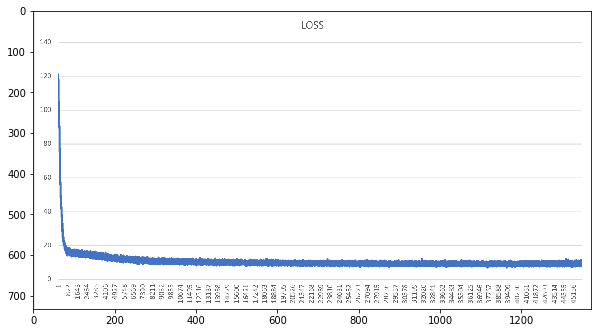

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
def BGR2RGB(Input):
    output = np.zeros(np.shape(Input));
    output[:,:,0] = Input[:,:,2] 
    output[:,:,1] = Input[:,:,1] 
    output[:,:,2] = Input[:,:,0]
    output = output.astype('uint8')
    return output
plot1 = cv2.imread('./loss.png')
plt.figure(figsize=(22,11))
plt.subplot(121),plt.imshow(BGR2RGB(plot1))

## Recognition Video and Images
Please [click here](https://www.youtube.com/watch?v=sWIldegPFvk&t=9s) to play the video for recognizing. 

Here is some sample images.

(<matplotlib.axes._subplots.AxesSubplot at 0x1c367eb2b0>,
 <matplotlib.image.AxesImage at 0x1c38d87080>)

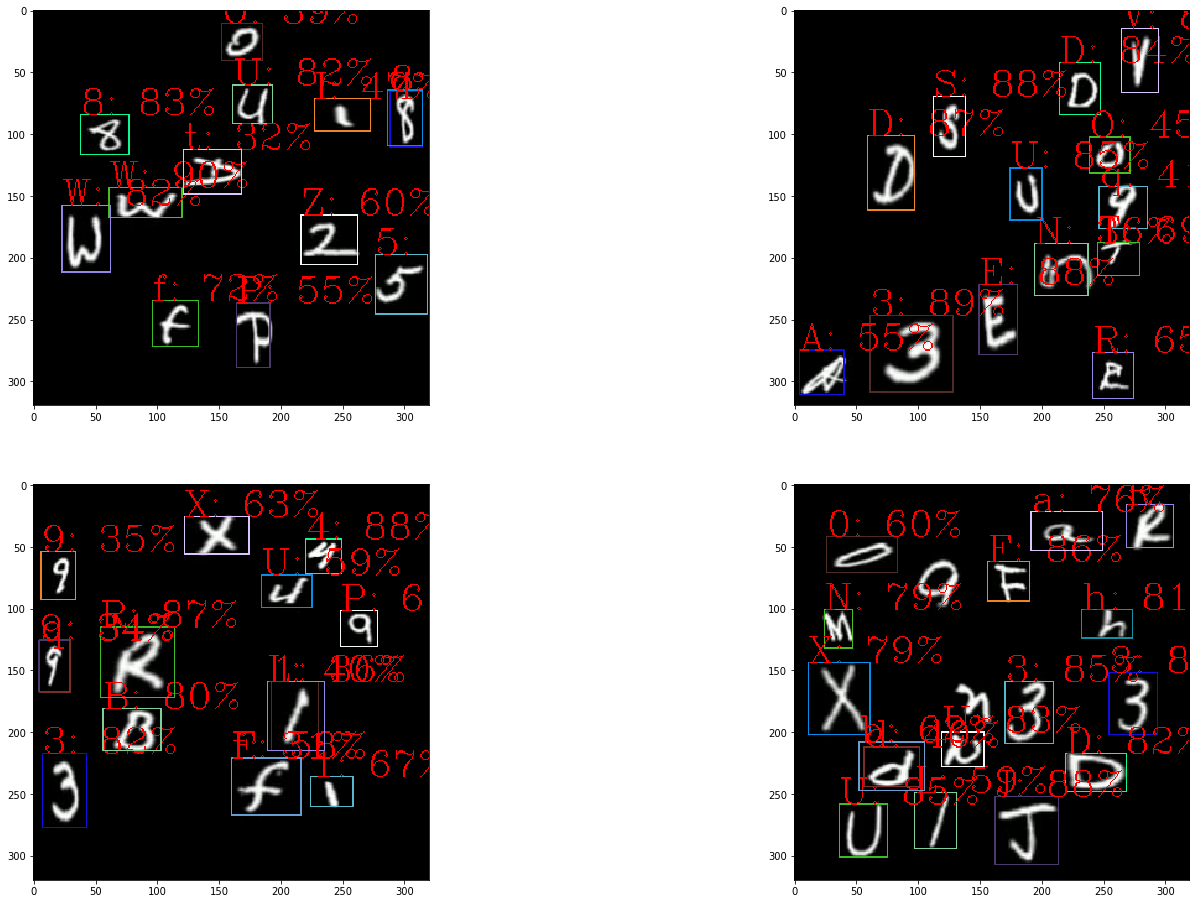

In [12]:
plot2 = cv2.imread('./tp/img_886.png')
plot3 = cv2.imread('./tp/img_887.png')
plot4 = cv2.imread('./tp/img_888.png')
plot5 = cv2.imread('./tp/img_889.png')
plt.figure(figsize=(25,16))
plt.subplot(221),plt.imshow(BGR2RGB(plot2))
plt.subplot(222),plt.imshow(BGR2RGB(plot3))
plt.subplot(223),plt.imshow(BGR2RGB(plot4))
plt.subplot(224),plt.imshow(BGR2RGB(plot5))

## Confusion Matrix and Accuracy

In [13]:
### display confusion matrix
print(conf_matrix)

[[18  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  1]]


In [19]:
### display accuracy for each digit or letter and average accuracy
print('letters', 'Precision', 'Recall', 'F1-Score')
for i in range(len(l)):
    print(l[i],'     ',np.round(each_pre[i],3),'     ',np.round(each_rec[i],3),'     ',np.round(F1_score[i],3))
print('Averge:',np.round(ave_precision,3),'    ',np.round(ave_rec,3),'  ',np.round(ave_f1,3))

letters Precision Recall F1-Score
0       0.9       0.621       0.735
1       0.611       0.917       0.733
2       0.833       0.938       0.882
3       0.895       1.0       0.944
4       0.941       1.0       0.97
5       1.0       0.867       0.929
6       0.938       1.0       0.968
7       0.8       0.857       0.828
8       0.889       0.889       0.889
9       0.897       0.929       0.912
A       1.0       0.867       0.929
B       0.682       0.938       0.789
C       1.0       1.0       1.0
D       0.933       0.875       0.903
E       1.0       1.0       1.0
F       0.889       0.444       0.593
G       1.0       0.929       0.963
H       0.909       0.833       0.87
I       0.667       0.833       0.741
J       1.0       0.611       0.759
K       0.889       0.889       0.889
L       0.7       0.438       0.538
M       0.75       0.375       0.5
N       0.96       0.828       0.889
O       0.857       0.923       0.889
P       0.714       0.769       0.741
Q       0.812   

In general, YOLO is an awesome deep learning algorithm, it has fast speed. In our model, after 46000 steps, the loss becomes stable, the value is around 6 to 8. The loss curve can prove this. But we trust that if we keep training for more epoachs, the loss will be reduced to 1 someday.  
In meanwhile, we also notice that the loss will increase a little bit after 55000 steps and back to 12. This is a point for future optimization work and a chance to go depth in YOLO.  
Then, the prediction accuracy is 84.7%, no so bad. For detailed prediction result, please check the smaple images and uploaded video.  
This is a very meaningful and interesting project. We really enjoy this experience!

# Appendix
## Testing 
### Convert the Testing Image to Video

In [6]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import time

In [3]:
import os
import numpy as np
from os.path import isfile, join
 
def convert_frames_to_video12(pathOut,fps):
    frame_array = []
    for i in range(1000):
        ID = str(i+1)
        while len(ID)<6:
            ID='0'+ID
        filename = ('./Images/%s.jpg' % (ID))
        #reading each files
        img = cv2.imread(filename)
        #print(np.shape(img))
        height, width, layers = np.shape(img)
        size = (width,height)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [4]:
pathOut='reco_yolo.mp4'
#pathIn='/Users/sunjian/Public/Document/4620/Project6/randyhand-will_dev/Images/'
convert_frames_to_video12(pathOut,3)

### Start Prediction

In [5]:
options={
    'model': 'cfg/tiny-yolo-voc-3c.cfg',
    'load': 48250,
    'threshold': 0.3
    #'gpu':1.0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 7.390975952148438e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13,

In [134]:
## do it in video
capture = cv2.VideoCapture('reco_yolo.mp4')
colors = [tuple(255 * np.random.rand(3)) for i in range(16)]
count=0
pred=[]
while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()
    if ret:
        results = tfnet.return_predict(frame) 
        for i in range(np.shape(results)[0]):
            label = results[i]['label']
            pred.append(label)
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            confidence = result['confidence']
            text = '{}: {:.0f}%'.format(label, confidence * 100)
            frame = cv2.rectangle(frame, tl, br, color, 1)
            frame = cv2.putText(frame, text, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
        count+=1
        MZ = ('./tp/img_%d.png' % (count))
        cv2.imwrite(MZ,frame) 
        cv2.imshow('frame', frame)
        #print('FPS {:.1f}'.format(1 / (time.time() - stime)))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        cv2.destroyAllWindows()
        break

### Convert the Predicted Result to Video

In [28]:
def convert_frames_to_video(pathOut,fps):
    frame_array = []
    for i in range(1000):
        filename = ('./tp/img_%d.png' % (i+1))
        #reading each files
        img = cv2.imread(filename)
        #print(np.shape(img))
        height, width, layers = np.shape(img)
        size = (width,height)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [29]:
pathOut='reco.mp4'
#pathIn='/Users/sunjian/Public/Document/4620/Project6/randyhand-will_dev/Images/'
convert_frames_to_video(pathOut,3)

## Confusion Matrix

In [7]:
conf_matrix=np.array([[18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[5,0,0,0,0,0,0,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

## Calculate Precision, Recall and F1-score 

In [8]:
row_sum=np.sum(conf_matrix,axis=1)
col_sum=np.sum(conf_matrix,axis=0)
total=sum(row_sum)
diagonal=0
each_pre=[]
each_rec=[]
F1_score=[]
for i in range(np.shape(row_sum)[0]):
    precis=conf_matrix[i,i]/row_sum[i]
    recall=conf_matrix[i,i]/col_sum[i]
    f1_sco=2*precis*recall/(precis+recall)
    each_pre.append(precis)
    each_rec.append(recall)
    F1_score.append(f1_sco)
    diagonal=diagonal+conf_matrix[i,i]
ave_precision=diagonal/total
l='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
ave_rec=0
ave_f1=0
count=0
for i in range(len(l)):
    if (i==45 or i==47): continue
    else:
        ave_rec=ave_rec+each_rec[i]
        count=count+1
ave_rec=ave_rec/count
for i in range(len(l)):
    if (i==45 or i==47):continue
    else:
        ave_f1=ave_f1+F1_score[i]
        count=count+1
ave_f1=ave_f1/count

/Users/sunjian/anaconda3/envs/tfw/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
